# Flipkart Laptop Reviews – Exploratory Data Analysis

This project performs an exploratory analysis of customer reviews for laptops listed on Flipkart. The dataset contains like brand, processor, RAM, storage, operating system, ratings, and more.

The goal is to identify patterns and meaningful insights from customer feedback. These insights can help in decision-making related to product development, customer satisfaction, or recommendation systems.

The steps in this notebook include:
- Setting up the environment
- Loading and verifying the dataset
- Exploring and cleaning the data
- Visualizing important trends
- Highlighting key patterns affecting laptop reviews


### Step 1 – Environment Setup and File Encoding

###### - To run this project in another environment, install the required packages using the `requirements.txt` file with the command: `pip install -r requirements.txt`



This project is built using:
- Python (via Anaconda)
- Jupyter Notebook (opened in VS Code)
- UTF-8 encoding is used when loading the CSV file to avoid problems with special characters like emojis or symbols in text data.

UTF-8 is the standard character encoding that supports almost every language and symbol. If the wrong encoding is used, the dataset may show corrupted characters (like �).

To verify the encoding:
- Open the file using a text editor like Notepad++
- Check the "Encoding" menu to confirm it's set to UTF-8
- If needed, re-save the file with UTF-8 encoding

In pandas, UTF-8 is set using `encoding='utf-8'` while reading the file.


#### Required Libraries


In [1]:
# Importing core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Enable inline plotting
%matplotlib inline

# Set visual theme
sns.set(style="whitegrid")

# Set display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Step 2 – Loading the Dataset

The dataset file `laptops_dataset_final_600.csv` is read using pandas with UTF-8 encoding. This ensures proper interpretation of all characters, especially in text-based columns like laptop names or reviews.


In [3]:
# #loading without encoding 
# df_raw = pd.read_csv('laptops_dataset_final_600.csv')
# print("Loaded successfully without encoding parameter.")
# display(df_raw.head())

In [4]:
# Recommended way — read with UTF-8 encoding
df = pd.read_csv('laptops_dataset_final_600.csv', encoding='utf-8')
print("Data loaded successfully using UTF-8 encoding.")

# Show the first few records
df.head()


Data loaded successfully using UTF-8 encoding.


,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


In [5]:
# Last few records
print("Last 5 rows: ")
df.tail()


Last 5 rows: 


,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
24108,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,MSI Laptop is high performance and the best. c...
24109,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,Excellent performance best laptop.
24110,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,4,"Good product, Lacks features.",Decent battery life. Exceptional build quality...
24111,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,3,Nice,The product does not support facial recognitio...
24112,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,4,Very Good,DISPLAY IS A LET DOWN. But the lenovo Pen work...


### Step 3 – Dataset Overview and Structure

The next step involves checking:
- Number of rows and columns
- Names and data types of all columns
- First and last few records
- Missing and duplicate data
- Unique values in important columns


In [6]:
# Show shape
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (24113, 7)


In [7]:
# Show all column names
print(f"Column names: {df.columns.tolist()}")

Column names: ['product_name', 'overall_rating', 'no_ratings', 'no_reviews', 'rating', 'title', 'review']


In [8]:
# Data types of each column
print("Data types: ")
print(df.dtypes)

Data types: 
product_name       object
overall_rating    float64
no_ratings         object
no_reviews         object
rating              int64
title              object
review             object
dtype: object


In [9]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
dtype: int64


In [10]:
# Duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 7122


In [11]:
print(df['review'].iloc[0])  # Contains emoji or symbols?

Loved it, it's my first MacBook that I earned from my hardwork 🥺❤️


- Encoding Display Test: The dataset was read using UTF-8 encoding. Special characters and emojis in the review text (such as 🥺❤️) are displayed correctly, confirming that no encoding issues are present.


### Step 4 – Understanding Key Columns

This dataset contains customer review information for various laptops listed on Flipkart. Below is a quick description of the available columns:

- `product_name`: The name and model of the laptop.
- `overall_rating`: The average rating given by all users for that product.
- `no_ratings`: Total number of users who rated the product.
- `no_reviews`: Total number of written reviews.
- `rating`: Rating given in this specific review (e.g., 1 to 5 stars).
- `title`: Title/summary of the review.
- `review`: Full content of the review.

These columns focus on customer feedback rather than hardware specifications. As such, analysis will focus on trends in ratings, review counts, and review content.


In [12]:
# Number of unique products
print("Number of unique laptop models:", df['product_name'].nunique())

Number of unique laptop models: 365


In [13]:
# 1st five Sample product names
print("Sample product names:")
print(df['product_name'].unique()[:5])

Sample product names:
['Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/Mac OS Monterey)...'
 'HP Backlit Intel Core i5 12th Gen 1235U - (8 GB/512 GB SSD/Win...'
 'DELL Inspiron 3520 Intel Core i3 12th Gen 1215U - (8 GB/512 GB...'
 'Lenovo Chromebook MediaTek Kompanio 520 - (4 GB/128 GB EMMC St...'
 'SAMSUNG Galaxy Book4 Metal Intel Core i3 13th Gen 1315U - (8 G...']


In [14]:
# Distribution of individual review ratings
print("Rating distribution:")
print(df['rating'].value_counts().sort_index())

Rating distribution:
rating
1     1809
2      668
3     2035
4     5629
5    13972
Name: count, dtype: int64


In [15]:
# Unique overall ratings
print("Unique average (overall) ratings:")
print(df['overall_rating'].unique())

Unique average (overall) ratings:
[4.7 4.2 3.7 4.5 4.1 4.3 4.  3.9 4.4 4.6 4.8 3.6 3.8 3.5 3.3 5. ]


In [16]:
# 1st ten Sample review titles
print("Sample review titles:")
print(df['title'].unique()[:10])

Sample review titles:
['Perfect product!' 'Fabulous!' 'Delightful' 'Awesome' 'Super!'
 'Mind-blowing purchase' 'Just wow!' 'Brilliant' 'Terrific'
 'Highly recommended']


In [17]:
#1st three Sample review text
print("Sample full reviews:")
print(df['review'].unique()[:3])

Sample full reviews:
["Loved it, it's my first MacBook that I earned from my hardwork 🥺❤️"
 "Battery lasted longer than my first relationship (2 days).\nListening to Arijit singh songs on full volume since then still isn't getting over. Has more warmth than her. unlike her there's two way communication here as touchpad is very responsive. fingerprint lock is nice as it only opens up to me. 5 stars for this -1 for her"
 'Such a great deal.. very happy with the performance and battery life..Origional product..🥰❤️\nThank you Flipkart..!!!']


#### Checking for Whitespace

This step checks if any text fields have unnecessary leading or trailing spaces. If any are found, they will be removed to clean the data.


In [18]:
# Check for leading/trailing whitespace in product_name
print("product_name: ",df['product_name'].apply(lambda x: x != x.strip()).sum())
print("title: ",df['title'].apply(lambda x: x != x.strip()).sum())
print("review: ",df['review'].apply(lambda x: x != x.strip()).sum())

product_name:  0
title:  0
review:  0


All key text fields (`product_name`, `title`, and `review`) were checked for leading and trailing whitespace. No issues were found, so no cleaning was necessary for this part.


### Step 5 – Data Cleaning

To prepare the dataset for accurate analysis, the following actions are performed:
- Remove duplicate records
- Convert `no_ratings` and `no_reviews` columns to numeric types by removing non-numeric characters like commas and plus signs


In [19]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print("Shape of the DataFrame: ", df.shape)

#copying the dataframe to a new dataframe
df_cp = df.copy()
print("Shape of the New DataFrame: ",df_cp.shape)

Number of duplicate rows: 7122
Shape of the DataFrame:  (24113, 7)
Shape of the New DataFrame:  (24113, 7)


In [20]:
# Remove duplicate rows
df_cp.drop_duplicates(inplace=True)

# Confirm updated shape
print("Shape after removing duplicates:", df_cp.shape)

Shape after removing duplicates: (16991, 7)


- Removing Duplicate Rows: The original dataset had 24,113 rows. After checking for duplicates, 7,122 duplicate rows were found and removed. The cleaned dataset now contains 16,991 unique records. A separate copy `df_cp` was created for cleaning to keep the original data intact.


#### Cleaning Count Columns (`no_ratings` and `no_reviews`)

The columns `no_ratings` and `no_reviews` originally contain text characters such as commas and plus signs (e.g., "1,234+", "100+"). These need to be converted into numeric types to support meaningful analysis.


In [21]:
df_cp.dtypes

product_name       object
overall_rating    float64
no_ratings         object
no_reviews         object
rating              int64
title              object
review             object
dtype: object

In [22]:
# Preview the format of the values before cleaning
print("Sample no_ratings values (before):", df_cp['no_ratings'].unique()[:5])
print("Sample no_reviews values (before):", df_cp['no_reviews'].unique()[:5])

Sample no_ratings values (before): ['15,210' '5,248' '3,899' '660' '1,323']
Sample no_reviews values (before): ['900' '272' '279' '42' '177']


In [23]:
# function to clean count columns
def clean_count_column(col):
    return col.str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(int)

# Apply cleaning to both columns in df_cp
df_cp['no_ratings'] = clean_count_column(df_cp['no_ratings'])
df_cp['no_reviews'] = clean_count_column(df_cp['no_reviews'])


In [24]:
# Check the data types and preview cleaned values
print("Data types after cleaning:")
print(df_cp[['no_ratings', 'no_reviews']].dtypes)

print("\nSample cleaned values:")
print(df_cp[['no_ratings', 'no_reviews']].head())

print("Sample no_ratings values (after):", df_cp['no_ratings'].unique()[:5])
print("Sample no_reviews values (after):", df_cp['no_reviews'].unique()[:5])


Data types after cleaning:
no_ratings    int32
no_reviews    int32
dtype: object

Sample cleaned values:
   no_ratings  no_reviews
0       15210         900
1       15210         900
2       15210         900
3       15210         900
4       15210         900
Sample no_ratings values (after): [15210  5248  3899   660  1323]
Sample no_reviews values (after): [900 272 279  42 177]


### Step 6 – Visual Analysis and Factor Exploration

This section explores rating patterns and review behavior using visualizations. The goal is to identify key factors contributing to higher or lower review scores.

Charts and summary tables help make sense of trends such as:
- Overall distribution of customer satisfaction (ratings)
- Which laptops get reviewed the most
- Relationship between review count and rating
- Length of customer reviews vs. the rating given

##### Step 6.1 – Distribution of Individual Review Ratings
This chart helps understand how customers are rating laptops individually. It shows whether most reviews are positive, negative, or neutral. If most ratings are 4 or 5 stars, it means people are generally satisfied with their purchases.

C:\Users\HP\AppData\Local\Temp\ipykernel_12100\2663586158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cp, x='rating', palette='coolwarm')


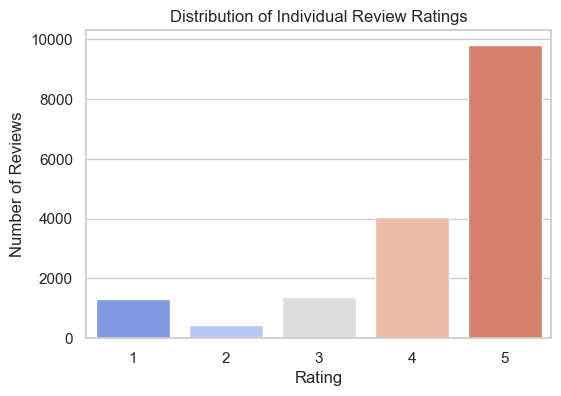

In [25]:
# Set figure size for better display
plt.figure(figsize=(6, 4))

# Create a bar chart of rating counts
sns.countplot(data=df_cp, x='rating', palette='coolwarm')

# title and labels
plt.title('Distribution of Individual Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12100\1347066247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_cp, x='rating', palette='coolwarm')


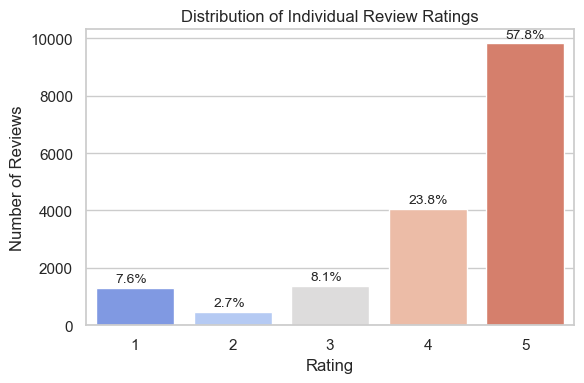

In [ ]:
# Create figure and barplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_cp, x='rating', palette='coolwarm')

# Title and labels
plt.title('Distribution of Individual Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Calculate and show percentages on top of bars
total = len(df_cp)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + 0.2, p.get_height() + 200), fontsize=10)

# Save the chart to your folder
save_path = r"Visual Analysis\review_rating_distribution.png"
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()